# Seaborn Lesson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#let's load in the tips dataset
tips = sns.load_dataset('tips')

In [3]:
#take a look at what tips holds
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#take a look at the datatypes, columns and nulls
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
#another way to just check the datatypes
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

## Scatter Plots

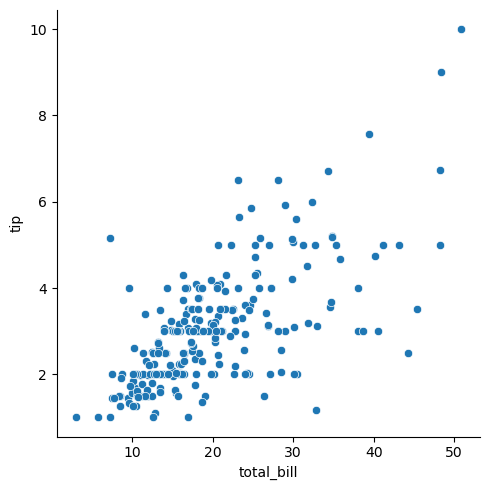

In [6]:
#this is just a very basic scatterplot
#we can see the x, y and that it's from the tips dataset
sns.relplot(x='total_bill', y='tip', data=tips)

Text(13.819444444444445, 0.5, 'Tip ($)')

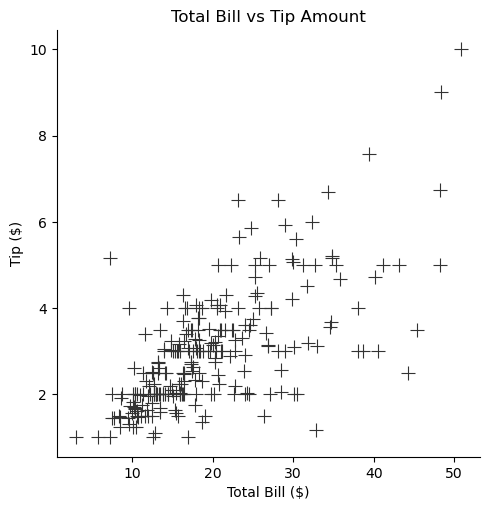

In [7]:
#now let's clean it up a bit
#we will use relplot to create the scatterplot
#here we are changing the marker from simple dot to a plus sign, changing size of marker, etc
sns.relplot(x='total_bill', y='tip', data=tips, s=100, color=".2", marker="+")

#using .title allows us to give the scatterplot a title
plt.title('Total Bill vs Tip Amount')

#using .xlabel allows us to give the x axis a label
plt.xlabel('Total Bill ($)')

#using .ylabel allows us to give the y axis a label
plt.ylabel('Tip ($)')

#plt.show()

## Kwargs

### ```col=```

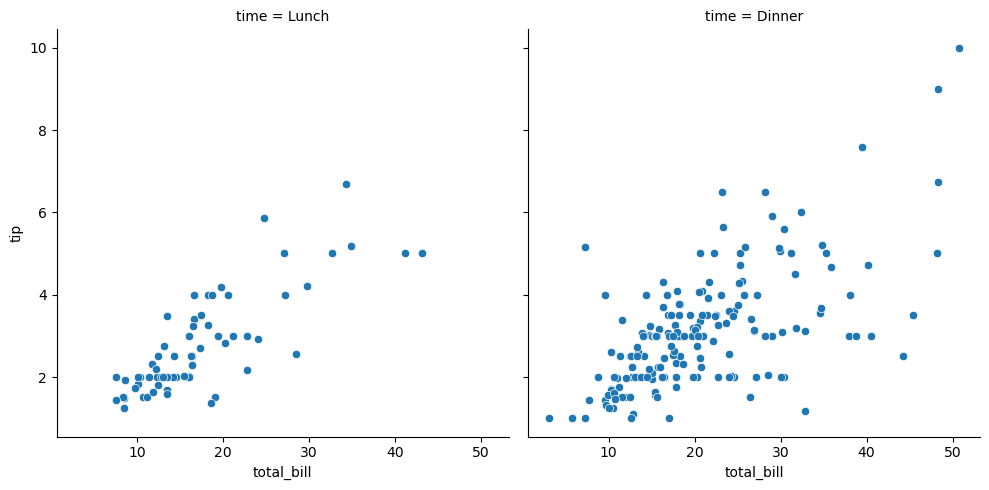

In [8]:
#let's make two separate graphs using 'time' to split the data
sns.relplot(x='total_bill', y='tip', col='time', data=tips)

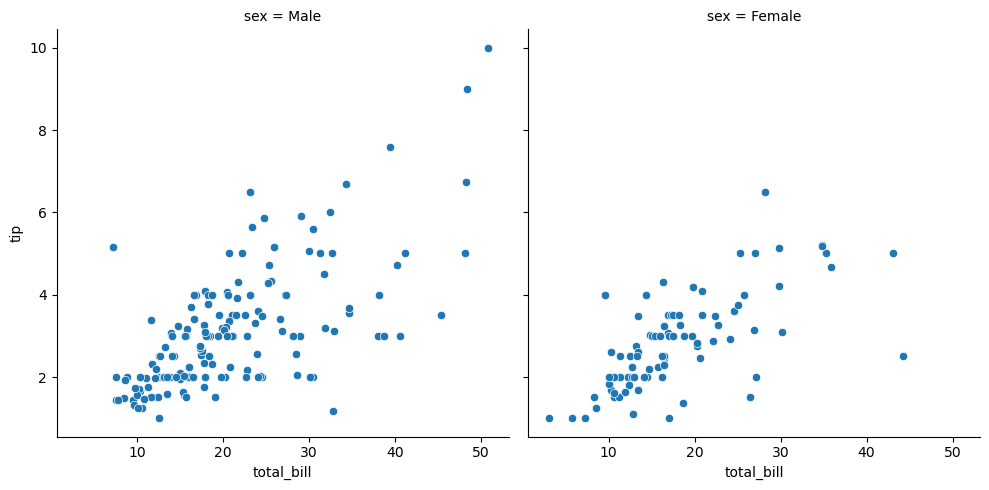

In [9]:
#what if I wanted to split on gender??
#we could technically use kwarg: col on any column
sns.relplot(x='total_bill', y='tip', col='sex', data=tips)

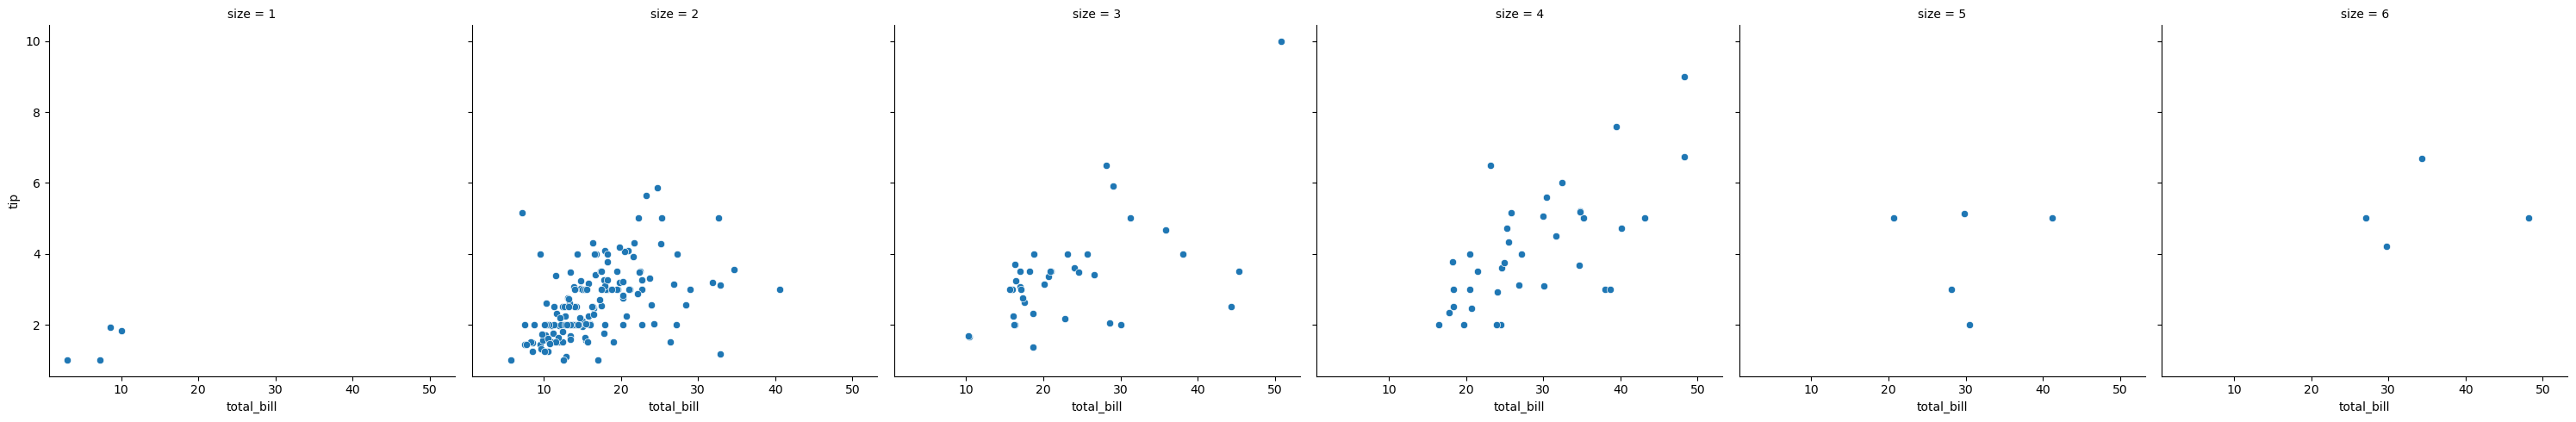

In [10]:
#but as we can see with size... it can get messy
sns.relplot(x='total_bill', y='tip', col='size', data=tips)

### ```col_wrap=```

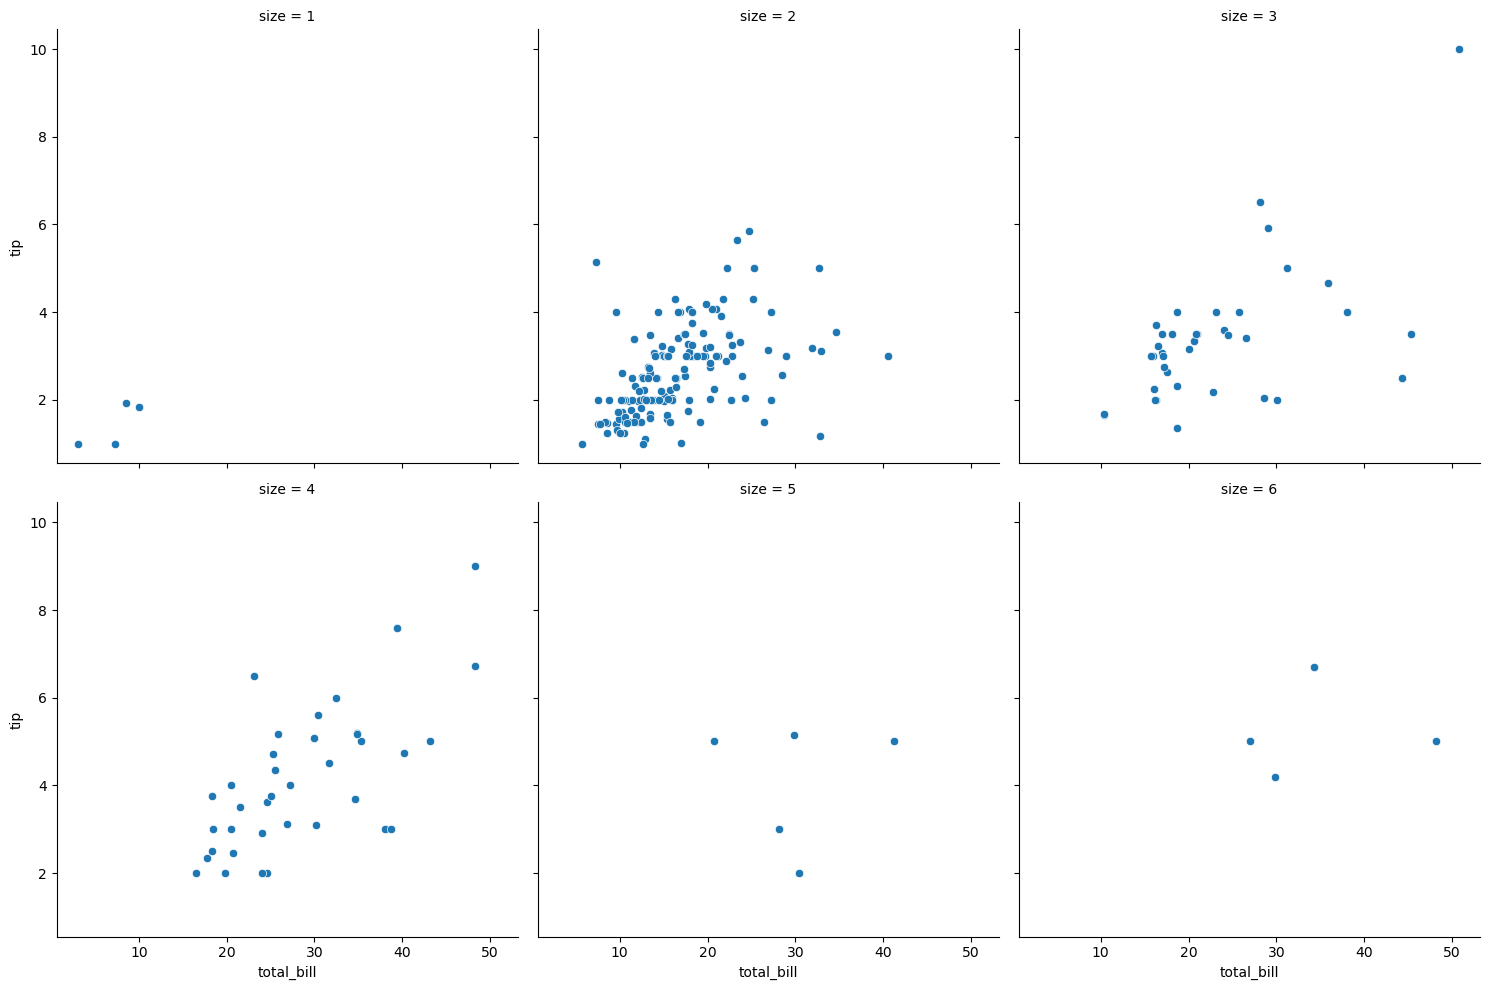

In [11]:
#col_wrap allows us to say how many we want on each row
sns.relplot(x='total_bill', y='tip', col='size', data=tips, col_wrap=3)

### ```hue=```

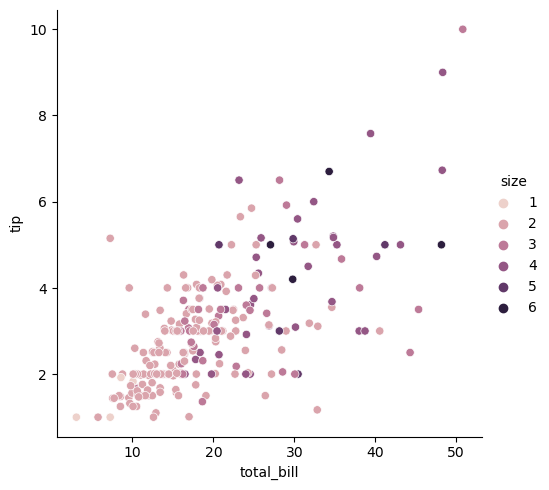

In [12]:
#for a column like size, I might choose to use 'style' or 'hue' instead so I don't end up with 6 graphs
sns.relplot(x='total_bill', y='tip', hue='size', data=tips)

### ```style=```

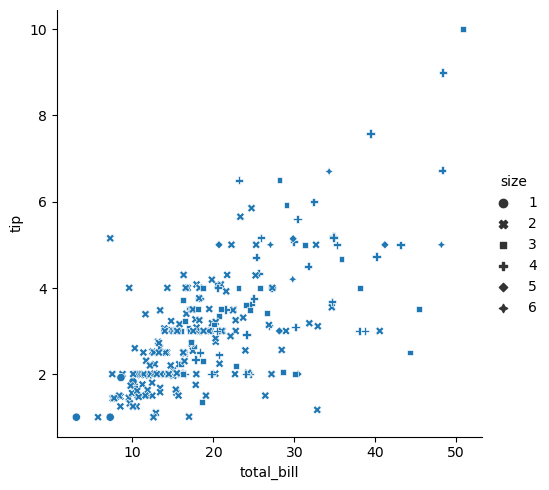

In [13]:
#let's lok at style
sns.relplot(x='total_bill', y='tip', style='size', data=tips)

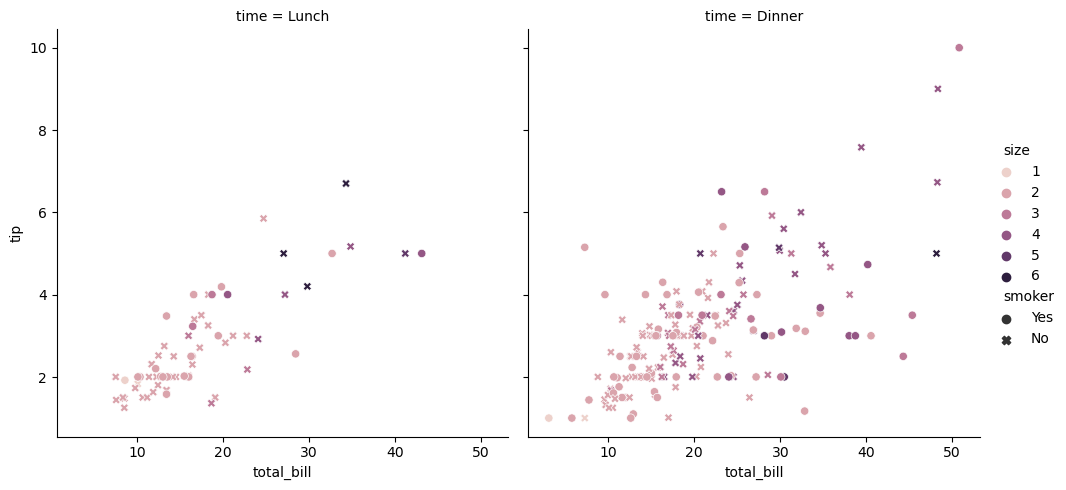

In [14]:
#combination of several kwargs
#col gave us two separate graphs
#style gave us different markers for smokers vs nonsmokers
#hue gave us different color markers for the party sizes
sns.relplot(x='total_bill', y='tip', col='time', hue='size', style='smoker', data=tips)

<hr style="border:2px solid gray">

# Histograms

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

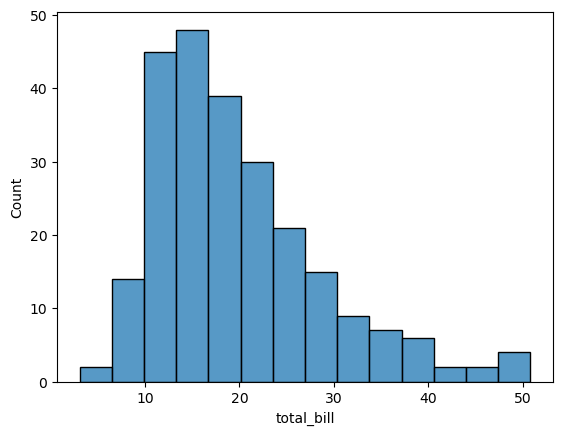

In [15]:
#histplot that shows the counts of total bills
sns.histplot(tips.total_bill)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

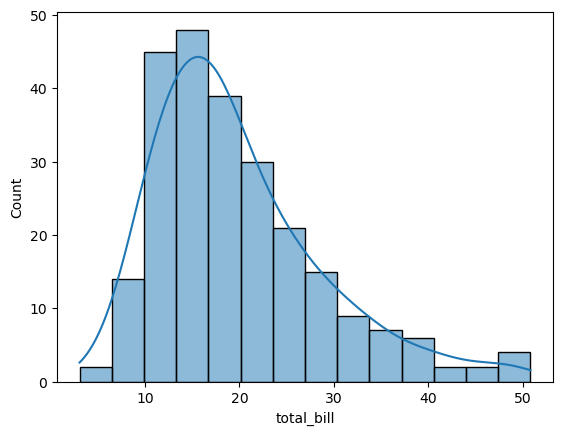

In [16]:
#now let's look at a histplot with kde=True
#this will show us the approximate distribution
sns.histplot(tips.total_bill, kde=True)

<hr style="border:2px solid gray">

# Boxplot

Text(0.5, 1.0, 'A "typical" boxplot')

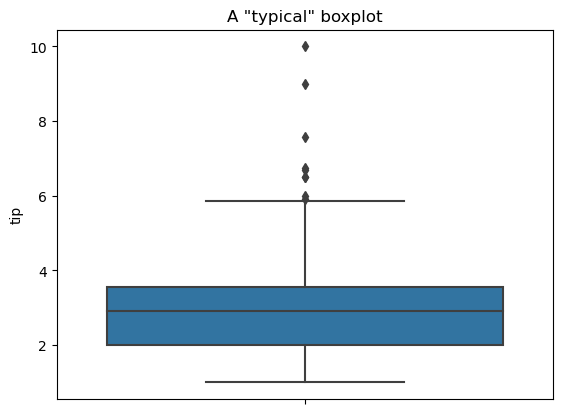

In [17]:
#a simple boxplot
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

Text(0.5, 1.0, 'Rotated 90$\\degree$')

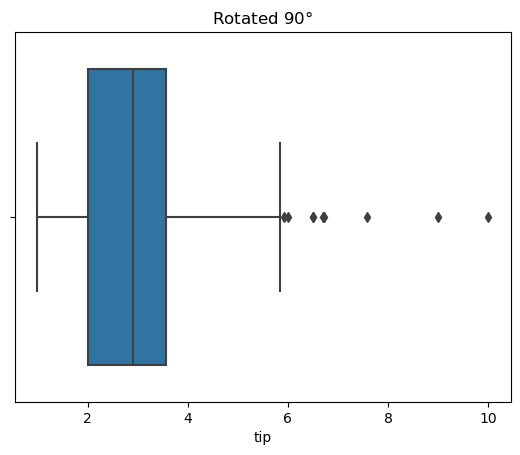

In [18]:
#we rotated this byt adding 'tip' to the X-axis instead of the Y-axis
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

Text(0.5, 1.0, 'Providing an x and y value groups the data')

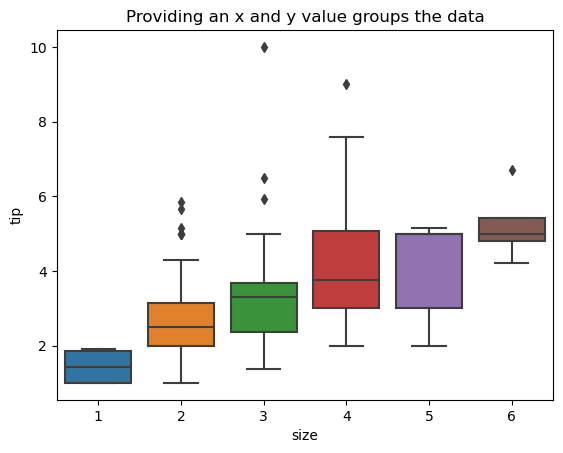

In [19]:
#now we are adding X and Y axis
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

Text(0.5, 1.0, 'You can also use other kwargs, like hue')

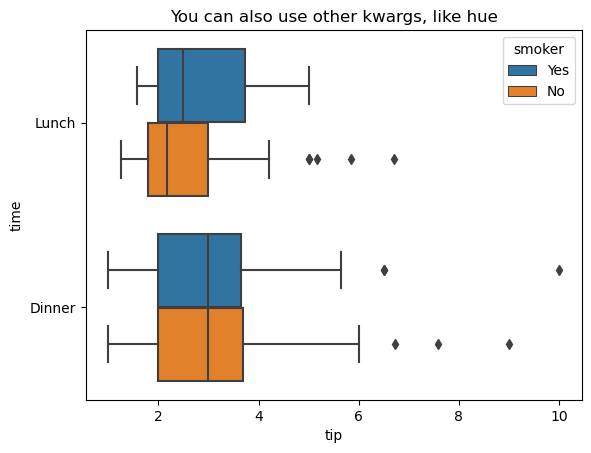

In [20]:
#let's through a hue in there
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

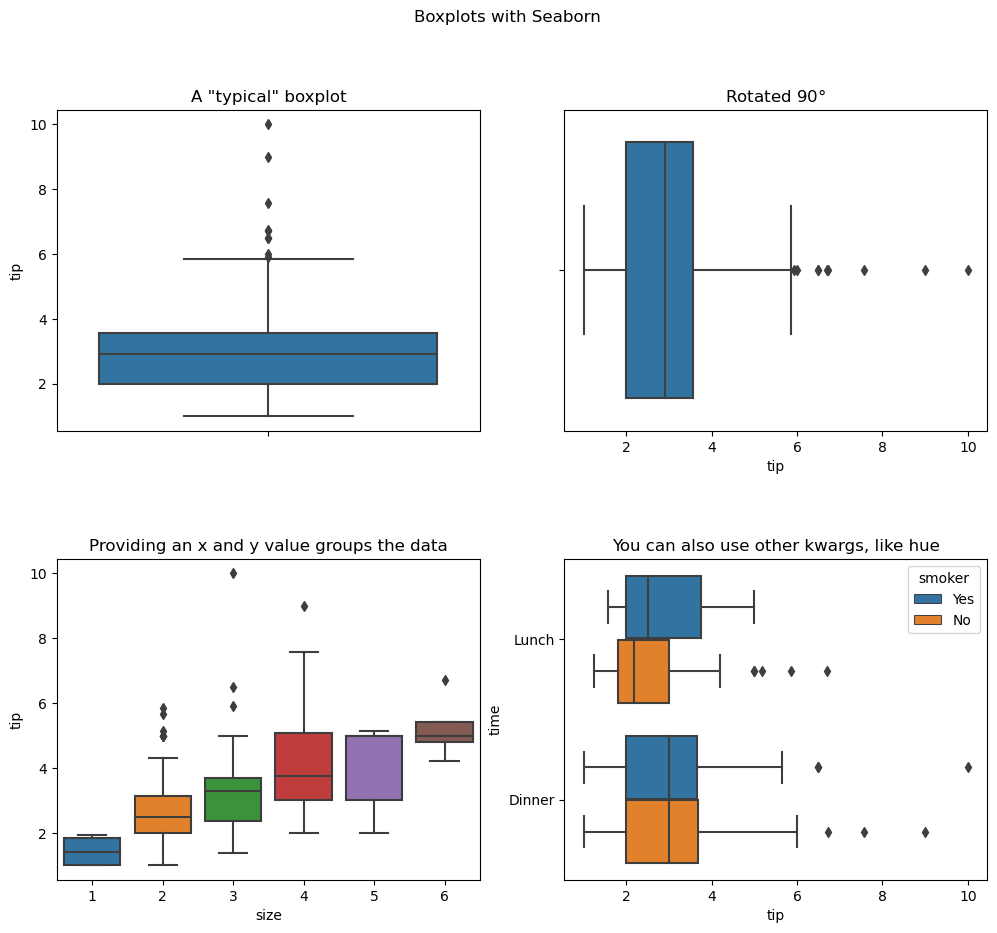

In [21]:
#we can put it all together using subplots

plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

<hr style="border:2px solid gray">

## Heatmap

size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


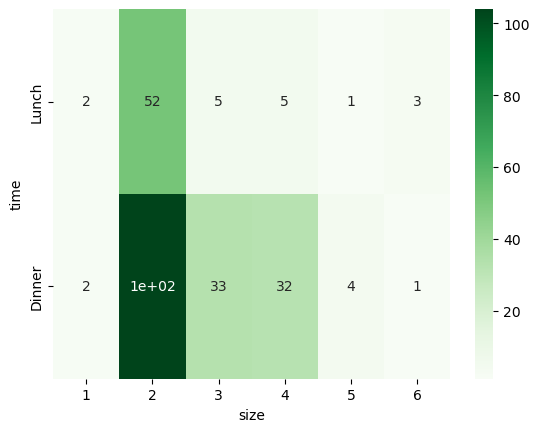

In [22]:
data = pd.crosstab(tips['time'], tips['size'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

<hr style="border:2px solid gray">

# Pairplot

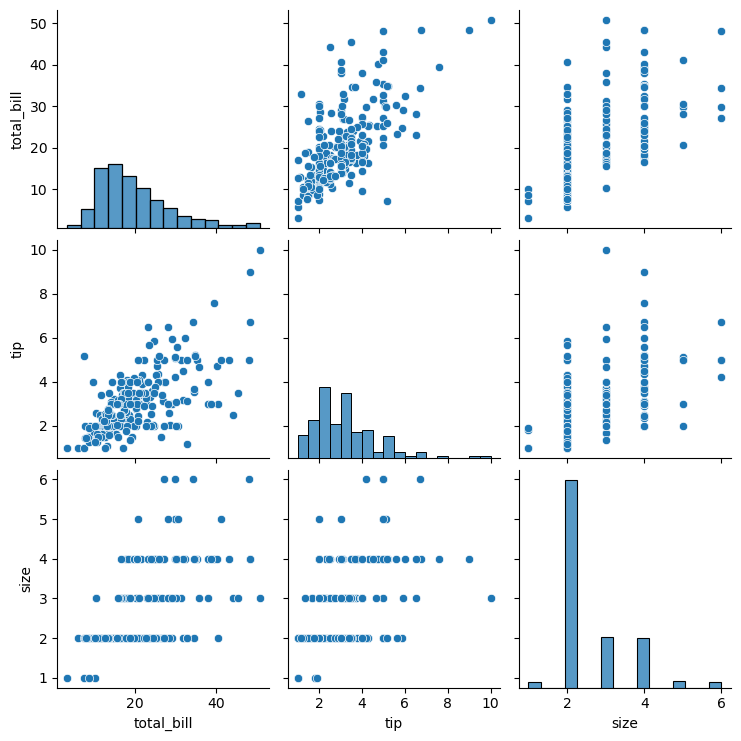

In [23]:
#very broad view of entire dataset
#shows relationship between quantitative feature (that's why categorical columns don't show)
sns.pairplot(tips)

# Jointplot

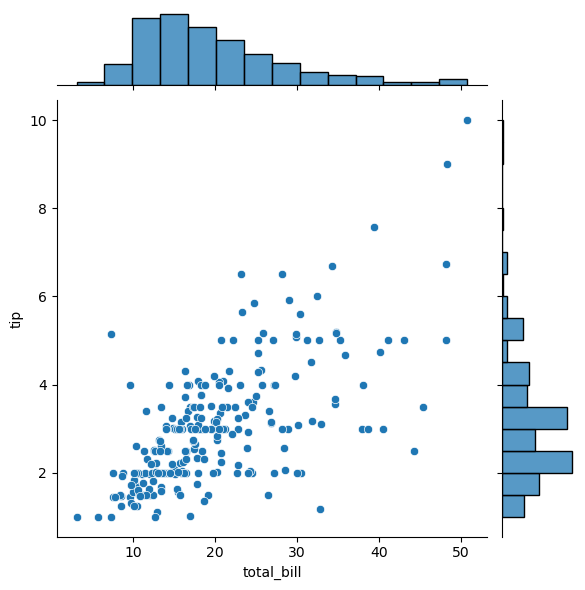

In [24]:
#histoplot and scatterplot together
sns.jointplot(data=tips, x='total_bill', y='tip')

<hr style="border:2px solid gray">